<a href="https://colab.research.google.com/github/Muhammadridho100902/google_collab/blob/main/Bike_Shared_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Nama dataset
- Nama: Muhammad Ridho Phageis Swara
- Email: uwater946@gmail.com

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : What is the trend in bicycle rental usage in 2011 and 2012 if seen by month

- pertanyaan 2 : What time do people usually rent bicycles based on 2011 and 2012

## Menyaipkan semua library yang dibuthkan

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

=========================================
Dataset characteristics
=========================================
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [2]:
dd = pd.read_csv('/content/day.csv')
dd.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hd = pd.read_csv('/content/hour.csv')
hd.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

1. Checking data types

In [4]:
dd.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
hd.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

2. Checking Null Values for both files

In [6]:
files = [dd, hd]

for i in files:
  print(i.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


3. Checking Missleading data

In [7]:
dd.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hd.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


4. Checking Data Distribution for some columns

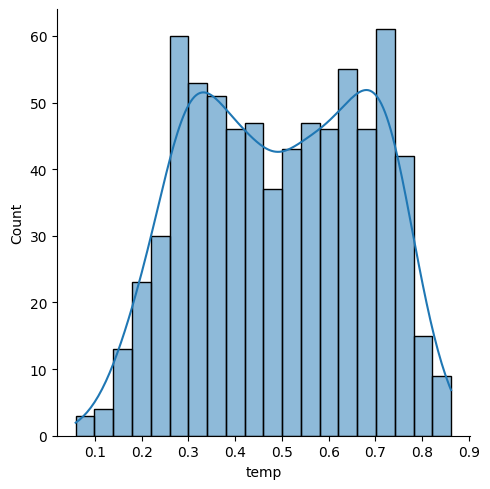

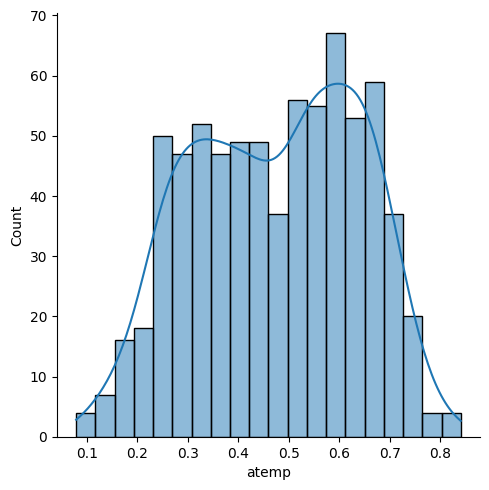

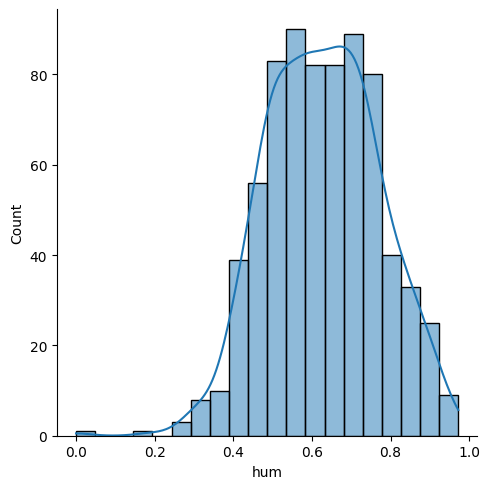

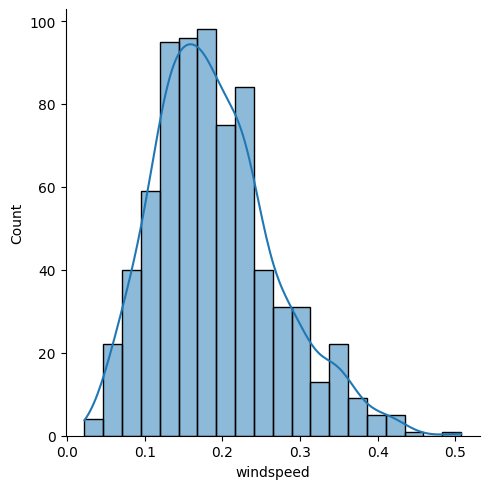

In [40]:
for i in dd.columns[9:13]:
  sns.displot(x=dd[i], bins=20, kde=True)
  plt.show()

5. Checking the outliers

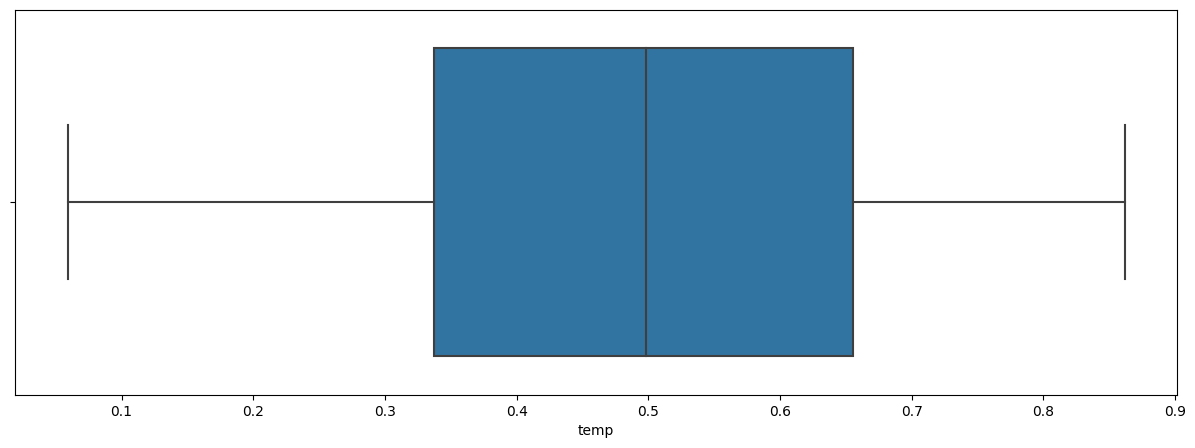

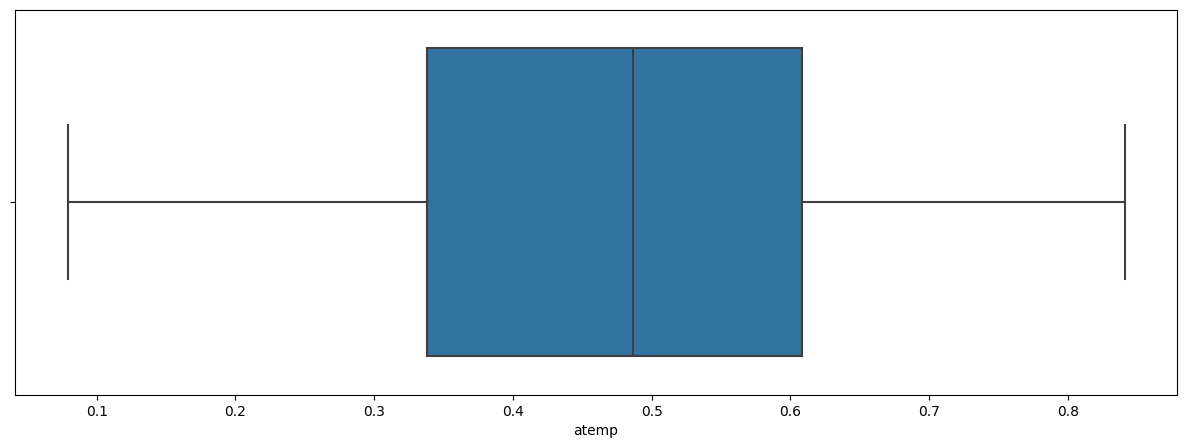

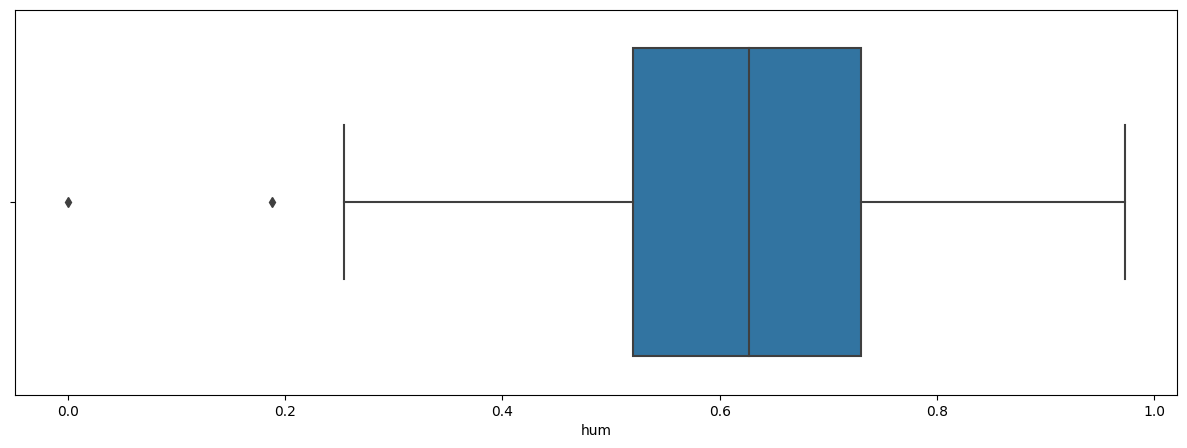

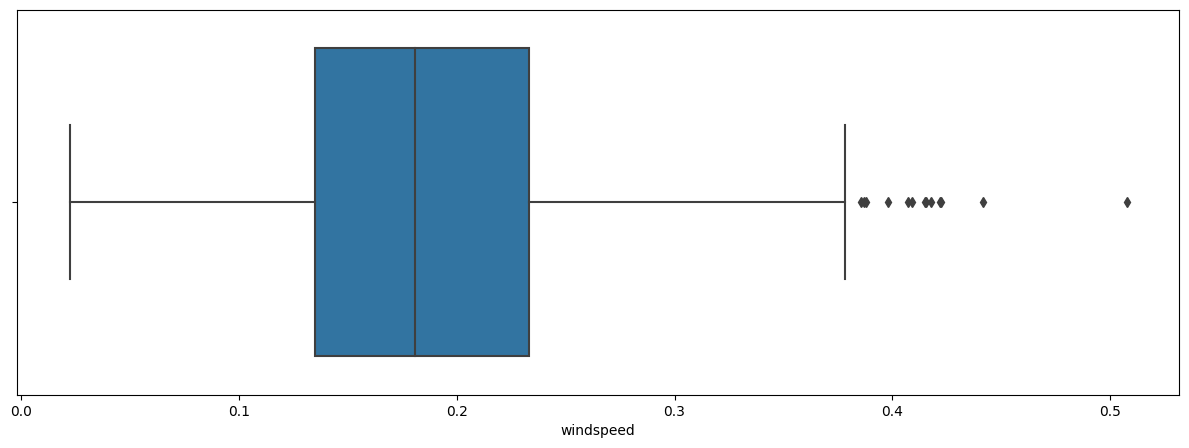

In [42]:
for i in dd.columns[9:13]:
  plt.figure(figsize=(15,5))
  sns.boxplot(x=dd[i])
  plt.show()

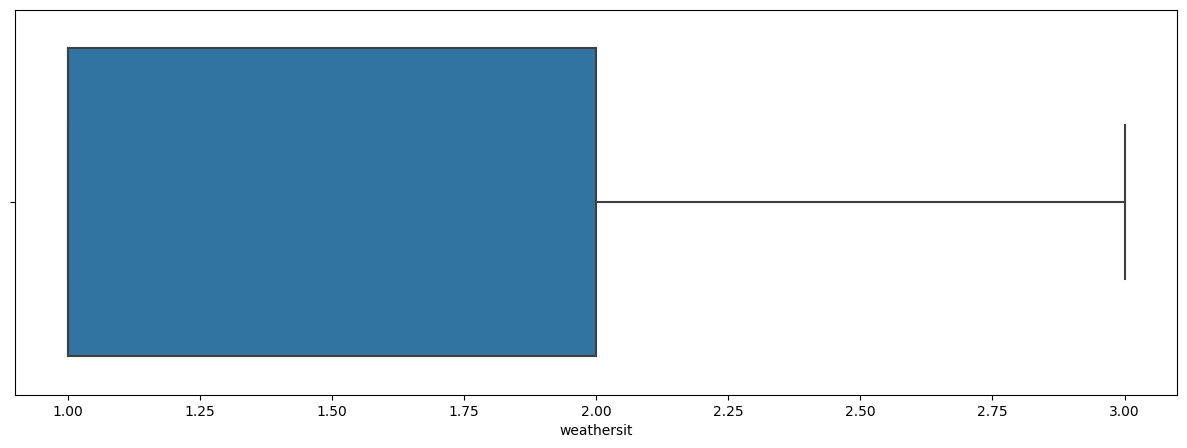

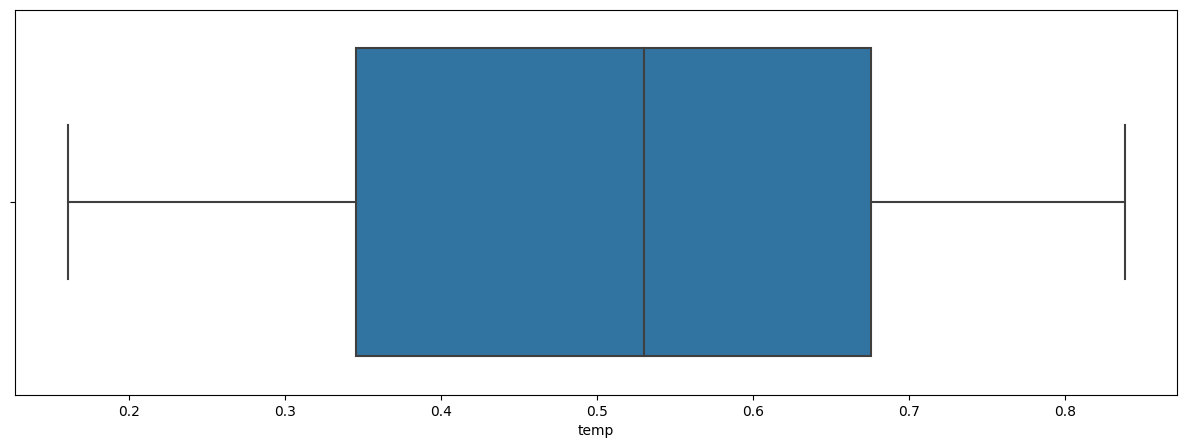

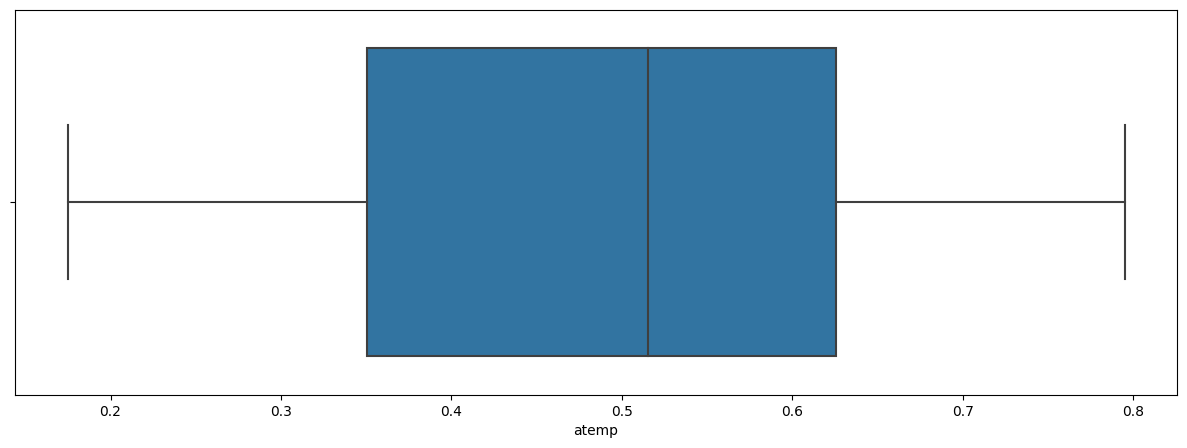

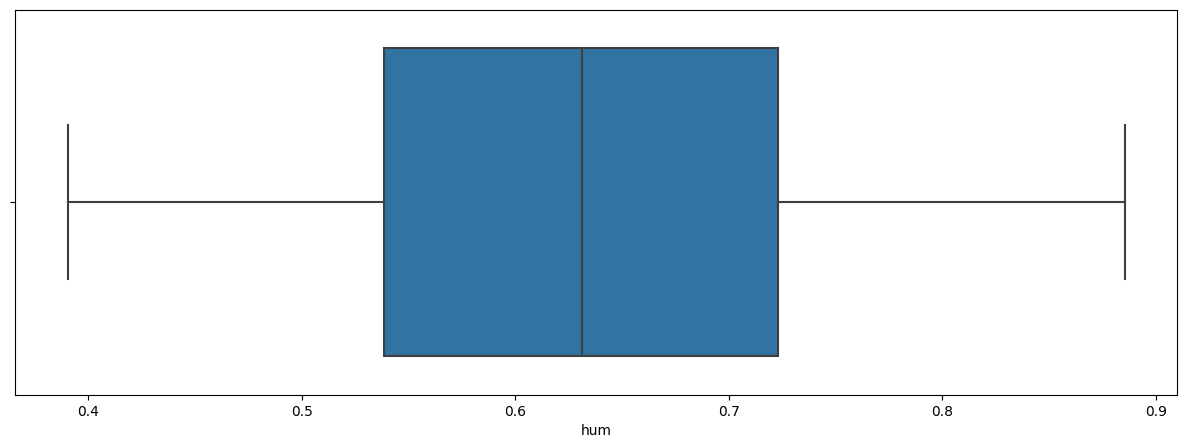

In [50]:
for i in hd.columns[9:13]:
  plt.figure(figsize=(15,5))
  sns.boxplot(x=dd[i])
  plt.show()

## Conclusion for assessing data. The data tends to be good because there is no missing values, no missleading data, but the problem with this data is only data types and it's not difficult for handle the miss data types and for some features has an outliers

### Cleaning Data

dteday is not an object, so we can change the data type using pandas for both files

In [9]:
dd['dteday'] = pd.to_datetime(dd['dteday'])
hd['dteday'] = pd.to_datetime(hd['dteday'])

Also we can get the value on features yr, mnth and hour using pandas and get the data from dteday feature for both files

In [10]:
def change_dtype(data):
  data['yr'] = data['dteday'].dt.year
  data['mnth'] = data['dteday'].dt.month

In [11]:
files = [dd, hd]

for i in files:
  change_dtype(i)
  print(i.head())

   instant     dteday  season    yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1  2011     1        0        6           0   
1        2 2011-01-02       1  2011     1        0        0           0   
2        3 2011-01-03       1  2011     1        0        1           1   
3        4 2011-01-04       1  2011     1        0        2           1   
4        5 2011-01-05       1  2011     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant     dteda

1. Cleaning The Outliers

In [47]:
from scipy.stats import stats

selected_columns = ['temp', 'atemp', 'hum', 'windspeed']

zscore = np.abs(stats.zscore(dd[selected_columns]))

threshold = 2

outlier_indices = np.where(zscore > threshold)[0]

dd = dd.drop(dd.index[outlier_indices])

<ipython-input-47-4a767687ad16>:5: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  zscore = np.abs(stats.zscore(dd[selected_columns]))


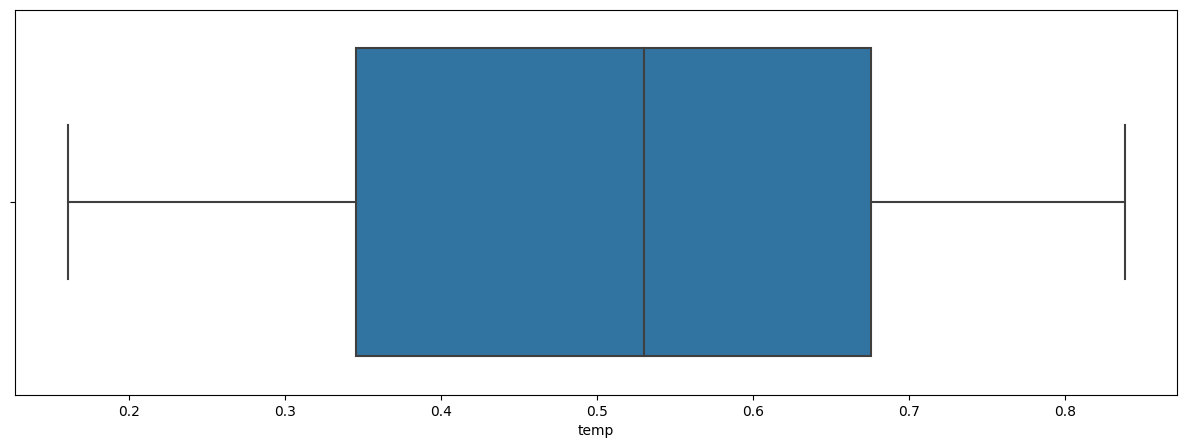

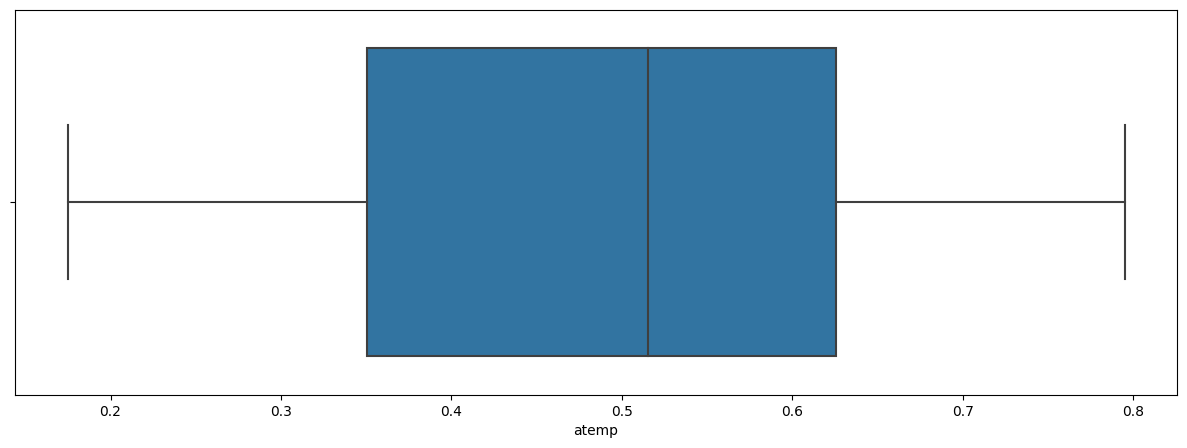

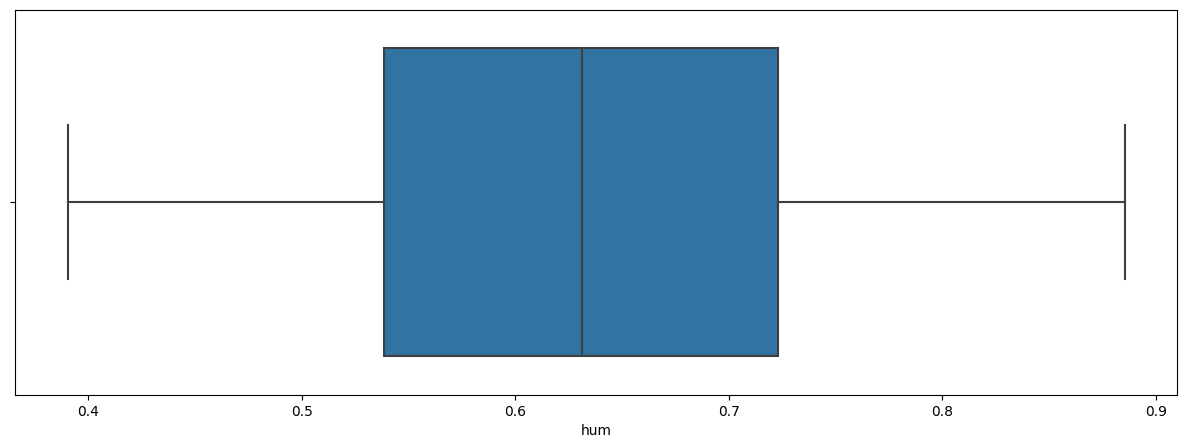

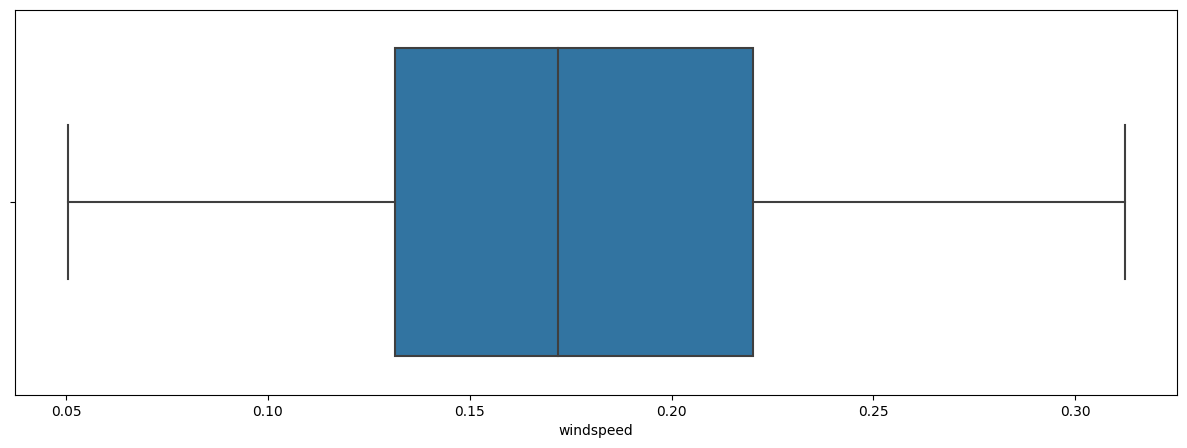

In [48]:
for i in dd.columns[9:13]:
  plt.figure(figsize=(15,5))
  sns.boxplot(x=dd[i])
  plt.show()

Conclusion for cleaning data, i just change data type from dteday to datetime and i change the value from some features(yr, mnth) by getting from dteday using pandas and cleaning some outliers

## Exploratory Data Analysis (EDA)

### Pertanyaan 1:

What is the trend in bicycle rental usage in 2011 and 2012 if seen by month

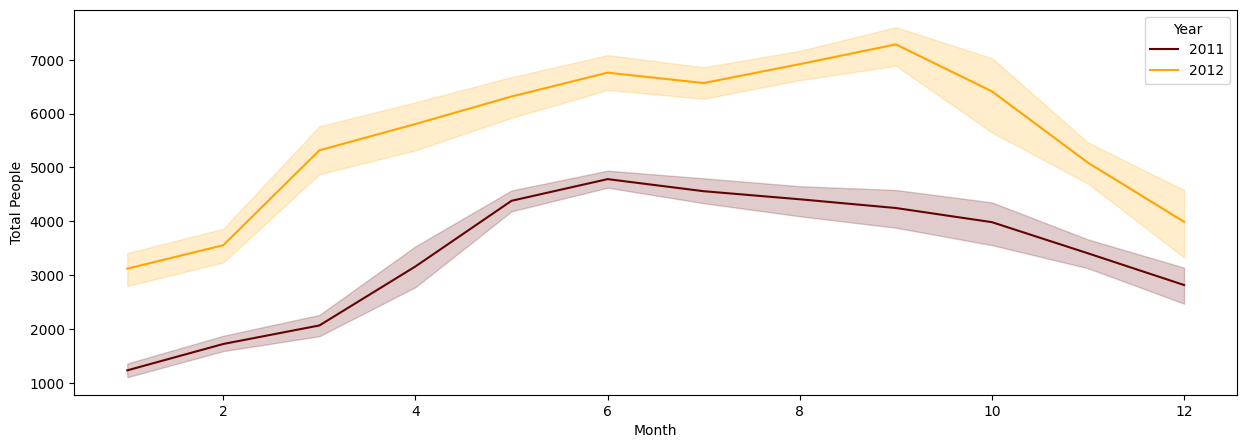

In [12]:
cust_palette = ["#640303", "orange"]

plt.figure(figsize=(15,5))
sns.lineplot(data= dd,x='mnth', y='cnt', hue='yr', palette=cust_palette)
plt.xlabel('Month')
plt.ylabel('Total People')
plt.legend(title='Year')
plt.show()

### Pertanyaan 2:

What time do people usually rent bicycles based on 2011 and 2012

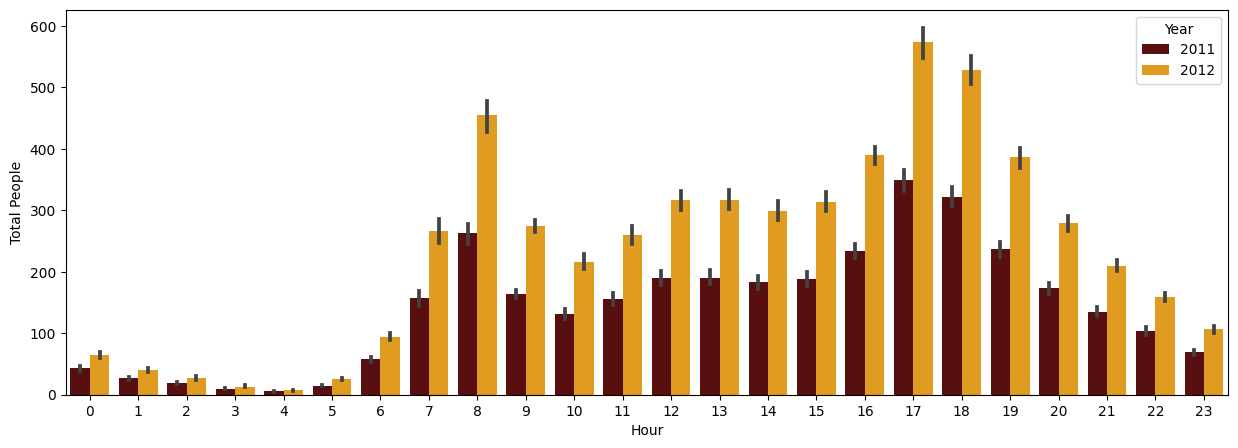

In [13]:
cust_palette = ["#640303", "orange"]

plt.figure(figsize=(15,5))
sns.barplot(data= hd,x='hr', y='cnt', hue='yr', palette=cust_palette)
plt.xlabel('Hour')
plt.ylabel('Total People')
plt.legend(title='Year')
plt.show()

## Conclusion

- Conclution pertanyaan 1 = The bike shared users increased from 2011 to 2012. We got some trend from the visualization, in december in every year have some trend, users decreased in December and come back in january and in 2012 in september become the highest users using bike shared but in 2011 the highest month in June

- conclution pertanyaan 2 = the users in 2011 and 2012 have the same pattern, the users usually rent the bikes at 17 - 19 o'clocks and also at 8 o'clocks but at 17 o'clocks become the highest users in 2011 and 2012